#  Set up Spotify API

##  Install Spotipy

In [1]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import the libraries
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import spotipy
import spotipy.util as util
import statistics 

from spotipy.oauth2 import SpotifyClientCredentials

In [4]:
#For TESTING only

#Low val will be 0 and high will be 1
# based on input, then we return true
#create dummy results for testing
#predicted_valance = np.array([1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,0,1,0])
#predicted_arousal = np.array([0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1])
#because all of the playlists so far on the right hand side of the arousal-valence emotion space model in order to be added, mode of valence should be above a certain threshold set bel



## Get Spotify authorisation

In [5]:
#set credentials
username = '21rxgfl6ldq7foech3qwegbaq'
scope = 'playlist-modify-public'
playlist_id = '2F2vSGtzgaufo97Z8brvr6'

energy_playlist_id = '3ys0dbKZUn9NXwGImwPG49'
focus_playlist_id = '5KRLJPXQqvXzdZrlJkhwuA'
relax_playlist_id = '6wyaI63Xl8DaP0w2kg9OX3'


track_id = ['74mG2xIxEUJwHckS0Co6jF']
#[6b2oQwSGFkzsMtQruIWm2p]


# credentials received from spotify development account
token = util.prompt_for_user_token(username, scope,
    client_id='704bb68f31ff4d3f99c783d993c847c9',
    client_secret='fc8bd533136b4c17b0db7020a022bcd2',
    redirect_uri='http://localhost:7777/callback')

#verify Oauth and toekn is valid
if token:
    sp = spotipy.Spotify(auth=token)
    sp.trace = False
    print("Token accepted for", username)
else:
    print("Can't get token for", username)




Token accepted for 21rxgfl6ldq7foech3qwegbaq


Different outputs of above predictions are:

binary arrays = [1,1,0,1,0.....]
tertiary arrays = [1,2,2,1,0.....]
continous arrays = [3.4,4.5,2.1,8.6....]

Lets make test ones below:

In [6]:
#binary
predicted_bin_valance = np.array([1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,0,1,0])
predicted_bin_arousal = np.array([0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1])

#tertiary
predicted_ter_valance = np.array([1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,0,1,0,1,1,1,1,1,0,1,0,1,0])
predicted_ter_arousal = np.array([0,0,2,2,2,2,2,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,1,0,1,1,1,1,1,1,1,1,1])

#continous
predicted_con_valance = np.array([8.4,5.2,6.4,4.4,6.7,7.3,8.6,2.3,4.4])
predicted_con_arousal = np.array([4.4,6.7,2.4,3.3,2.1,5.6,2.2,1.2,1.1])

### Calculate the mean and mode from prediction

In [10]:
#calculate binary means + modes
ars_bin_mode = (statistics.mode(predicted_bin_arousal))
val_bin_mode = (statistics.mode(predicted_bin_valance))

ars_bin_mean =  predicted_bin_arousal.mean()
val_bin_mean =  predicted_bin_valance.mean()



#calculate tertiary means + modes
ars_ter_mode = (statistics.mode(predicted_ter_arousal))
val_ter_mode = (statistics.mode(predicted_ter_valance))

ars_ter_mean =  predicted_ter_arousal.mean()
val_ter_mean =  predicted_ter_valance.mean()


#calculate tertiary means

ars_con_mean =  predicted_con_arousal.mean()
val_con_mean =  predicted_con_valance.mean()

val_bin_mode = 1
ars_bin_mode = 0


# Plot results on Valance-Arousal Space

### Two-dimensional valence-arousal space

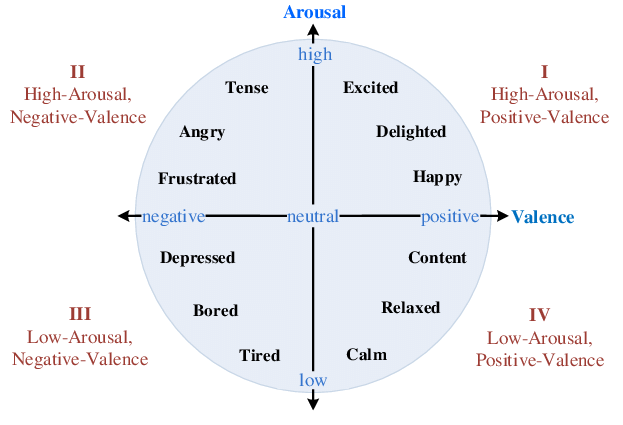

## Binary Plot on Arousal-Valence emotion space

### Binary Plot on Arousal-Valence emotion space

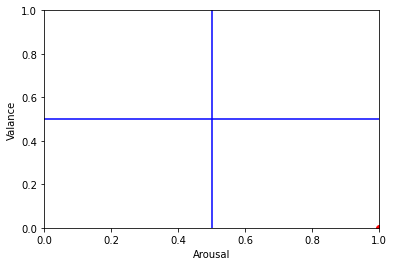

In [13]:
plt.plot(val_bin_mode,ars_bin_mode,'ro')
plt.xlabel("Arousal")
plt.ylabel("Valance")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axvline(.5, color='b', label="hello")
plt.axhline(.5, color='b')

## Tertiary Plot on Arousal-Valence emotion space

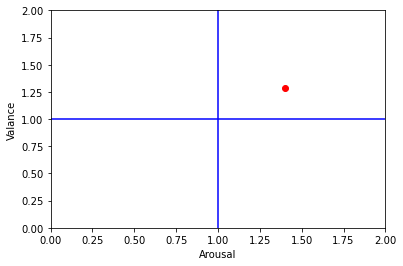

In [8]:
plt.plot(val_ter_mean,ars_ter_mean,'ro')
plt.xlabel("Arousal")
plt.ylabel("Valance")
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.axvline(1, color='b', label="hello")
plt.axhline(1, color='b')

## Continous Plot on Arousal-Valence emotion space

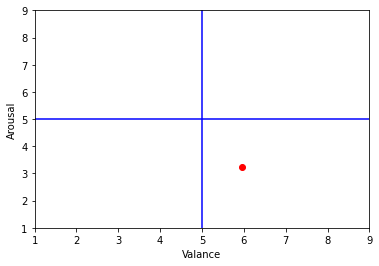

In [14]:
plt.plot(val_con_mean,ars_con_mean,'ro')
plt.xlabel("Valance")
plt.ylabel("Arousal")
plt.xlim(1, 9)
plt.ylim(1, 9)
plt.axvline(5, color='b', label="hello")
plt.axhline(5, color='b')

In [15]:
print(val_con_mean,ars_con_mean)

5.966666666666666 3.2222222222222223


# Spotify Playlist Integration

## Binary Playlist


Two options exist for both arousal and valance (0,1)

Valance:
        0 = Negative Valance
        1 = Positive Valance
        
Arousal:
        0 = Low Arousal
        1 = Positive Arousal


### Check if song is considered 'Relaxing'

ie: Positive-Valence, Low-Arousal

In [10]:
#verify positive val, and low ars
if val_bin_mode == 1 and ars_bin_mode == 0:
    
    sp.user_playlist_add_tracks(username, relax_playlist_id, track_id)
    print("Added to relaxing playlist!")
    
else:
    
  print("This song was not considered to be relaxing")

This song was not considered to be relaxing


### Check if song is condsidered 'Uplifiting'

ie: Positive Valence, High-Arousal



In [11]:
#verify positive val, and high ars
if val_bin_mode == 1 and ars_bin_mode == 1:
    sp.user_playlist_add_tracks(username, energy_playlist_id, track_id)
    print("Added to uplifitng playlist!")
else:
  print("This song was not considered to be uplifiting")

Added to uplifitng playlist!


## Tertiary Playlist

Three options exist for both arousal and valance (0,1,2)

Valance:
        0 = Negative Valance
        1 = Netrual Valance
        2 = Positive Valance
        
Arousal:
        0 = Low Arousal
        1 = Netrual Arousal
        2 = Positive Arousal  
        
      
        

### Check if song is considered 'Relaxing'

ie: Positive-Valence, Low-Arousal
ie. val_ter_mode == 2 and ars_ter_mode == 0

In [12]:
print(val_ter_mode,ars_ter_mode)

2 1


In [13]:
#verify positive val, and low ars
if val_ter_mode == 2 and ars_ter_mode == 0:
    
    sp.user_playlist_add_tracks(username, relax_playlist_id, track_id)
    print("Added to relaxing playlist!")
    
else:
    
  print("This song was not considered to be relaxing")

This song was not considered to be relaxing


### Check if song is considered fits 'Focus'

ie: Positive-Valence, Neutral-Arousal
ie. val_ter_mode == 2 and ars_ter_mode == 1

In [14]:
#verify positive val, and med ars
if val_ter_mode == 2 and ars_ter_mode == 1:
    
    sp.user_playlist_add_tracks(username, focus_playlist_id, track_id)
    print("Added to focus playlist!")
    
else:
    
  print("This song was not considered to be focusing appropriate")

Added to focus playlist!


### Check if song is considered fits 'Uplifting'

ie: Positive-Valence, High-Arousal
ie. val_ter_mode == 2 and ars_ter_mode == 2

In [15]:
#verify positive val, and high ars
if val_ter_mode == 2 and ars_ter_mode == 2:
    
    sp.user_playlist_add_tracks(username, energy_playlist_id, track_id)
    print("Added to uplifting playlist!")
    
else:
    
  print("This song was not considered to be uplifting")

This song was not considered to be uplifting


## Continous Playlist

Unlimited options exist for both arousal and valance (float between 1-9) where 9 is highest 

In [16]:
#set continous label thresholds:
#low = less than 4 
#netural = 4 - 6
#high = more than 6
low = 4

high = 6

pos = 5


### Check if song is considered 'Relaxing'

ie: Positive-Valence, Low-Arousal
ie. val_con_mean >= 4.5 and ars_con_mean < 4.5

In [17]:
#verify positive val, and low ars
if val_con_mean >= pos and ars_con_mean < pos:
    
    sp.user_playlist_add_tracks(username, relax_playlist_id, track_id)
    print("Added to relaxing playlist!")
    
else:
    
  print("This song was not considered to be relaxing")

Added to relaxing playlist!


### Check if song fits 'Focus'

ie: Positive-Valence, Neutral-Arousal
ie. val_con_mean >= 5 and (ars_con_mean < 6.5 and ars_con_mean > 4.5)

In [18]:
#verify positive val, and neutral ars
if val_con_mean >= pos and ars_con_mean < high and ars_con_mean > low:
    
    sp.user_playlist_add_tracks(username, focus_playlist_id, track_id)
    print("Added to focus playlist!")
    
else:
    
  print("This song was not considered to be focusing appropriate")

This song was not considered to be focusing appropriate


### Check if song is considered 'Uplifting'

ie: Positive-Valence, High-Arousal
ie. if val_con_mean >= 5 and ars_con_mean >= 5:

In [19]:
#verify positive val, and high ars
if val_con_mean >= pos and ars_con_mean >= pos:
    
    sp.user_playlist_add_tracks(username, energy_playlist_id, track_id)
    print("Added to uplifting playlist!")
    
else:
    
  print("This song was not considered to be uplifting")

This song was not considered to be uplifting
